In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import nmrglue as ng
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [3]:
from trentnmr import *

In [9]:
data_folder = '/home/tyler/data/Sep-2016-23Na/VT/*.fid'

In [13]:
data_files = sorted(glob.glob(data_folder))
# data_files

In [17]:
# Make a dictionary using the paths as keys, this way
# I will not lose them.
data_dict = {f: read_varian_as_nmrpipe(f) for f in data_files}
# data_dict  # Very long output.

In [24]:
processed_dict = {f: process_fid(value[0], value[1]) for f, value in data_dict.items()}

Optimization terminated successfully.
         Current function value: 34701.679688
         Iterations: 63
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.005859
         Iterations: 56
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: 0.000977
         Iterations: 60
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 59
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.001953
         Iterations: 58
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.003906
         Iterations: 59
         Function evaluations: 110
Optimization terminated

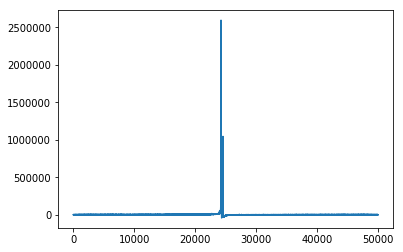

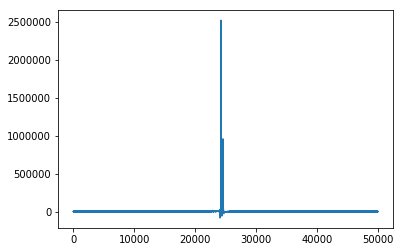

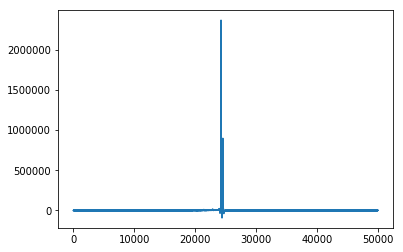

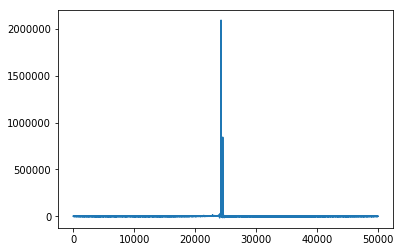

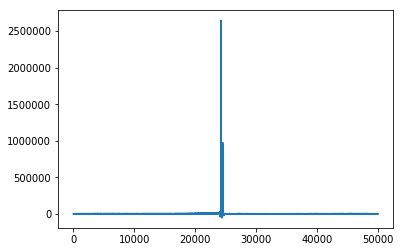

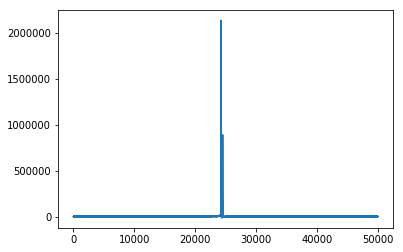

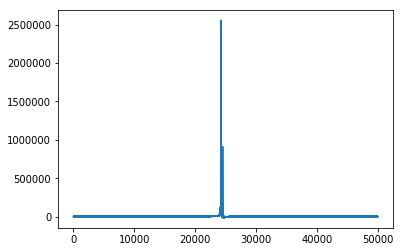

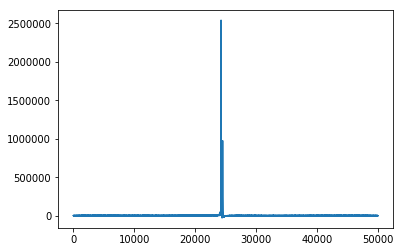

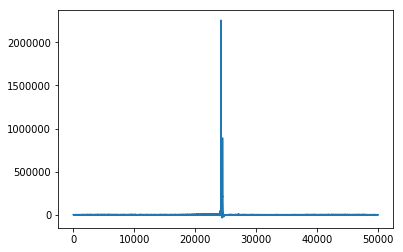

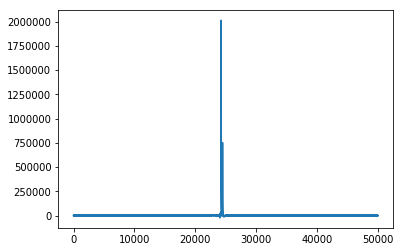

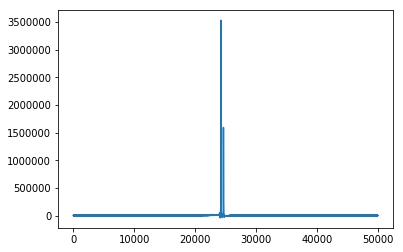

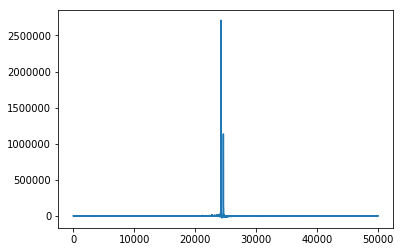

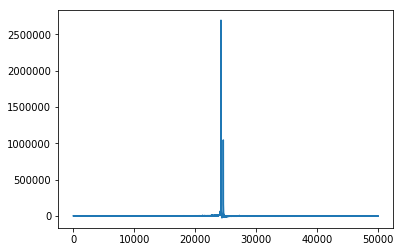

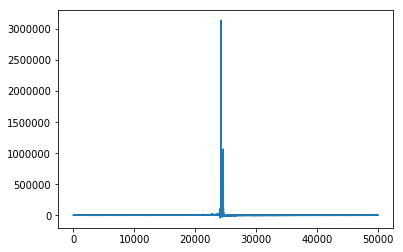

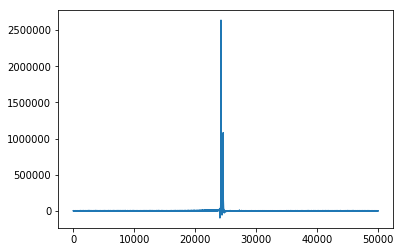

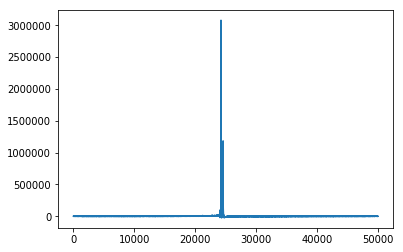

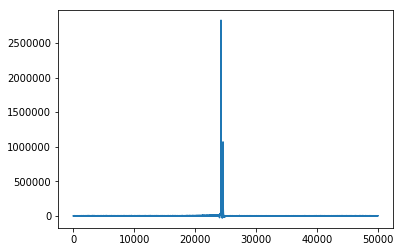

In [41]:
for idx, item in enumerate(processed_dict.items()):
    key, value = item
    dic, data = value
    
    plt.figure()
    plt.plot(data)
    
#     break

In [ ]:
#   plot 0     plot 1    plot 2   plot 3
x=[[1,2,3,4],[1,4,3,4],[1,2,3,4],[9,8,7,4]]
y=[[3,2,3,4],[3,6,3,4],[6,7,8,9],[3,2,2,4]]

plots = zip(x,y)
def loop_plot(plots):
    figs={}
    axs={}
    for idx,plot in enumerate(plots):
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].plot(plot[0],plot[1])
return figs, axs

figs, axs = loop_plot(plots)